# Trend

Trend is defined as the direction of growth over a period of time.  There can be be upwards, downwards, and flat trends. Many times, trend is obvious by looking at a simple plot of data.  

There are two main reasons for trend discovery:

1.  Remove a trend from nonstationary to prepare for modeling (particularly for forecasting)
2.  Being able to charecterize the behavior by separating trend

Time series models can be influenced by falsely correlated due to trends.   A common example is that a rising inflation would cause an inflation for home sales prices.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm                                                                                                                          
import statsmodels.formula.api as smf                                                                                                                 
import statsmodels.tsa.api as smt
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




%matplotlib inline

/Users/michaelbeale/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Typically trend is shown as a linear regression which is just a straight line.  But this model falls flat if there trend starts to change.  There could be a global trend and more then one local trends.

### Linear Trend

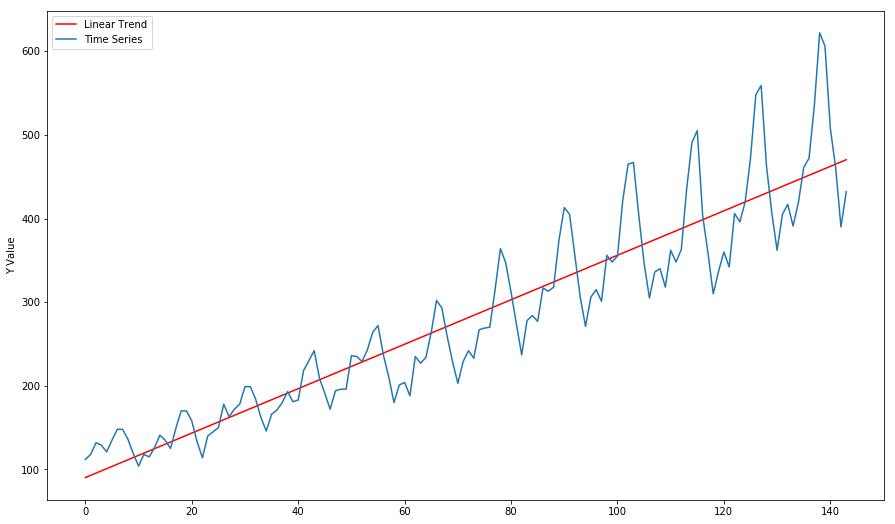

In [8]:
air = pd.read_csv('data/international-airline-passengers.csv', header=0, index_col=0, parse_dates=[0])
target = air.reset_index()['n_pass_thousands']


X = [i for i in range(0, len(air))]
X = np.reshape(X, (len(X), 1))
y = air['n_pass_thousands'].values
#model = LinearRegression()
#model.fit(X, y)
# calculate trend
#trend = model.predict(X)
# plot trend



from statsmodels import regression
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    fig = plt.figure(1, figsize=(15, 9))
    ax = fig.add_subplot(111)
    ax.plot(X2, Y_hat, 'r', label="Linear Trend")
    ax.plot(y, label='Time Series')
    ax.legend()


    #X2 = np.linspace(X.min(), X.max(), 100)
    #Y_hat = X2 * b + a
    #plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    #plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    #plt.xlabel('X Value')

    plt.ylabel('Y Value')
    return model.summary()

summary = linreg(X, y)

Sometimes a Linear trend doesn't show the picture.  The trend could be going down, up, and flat all in one viewable period.

### Quadratic Trend

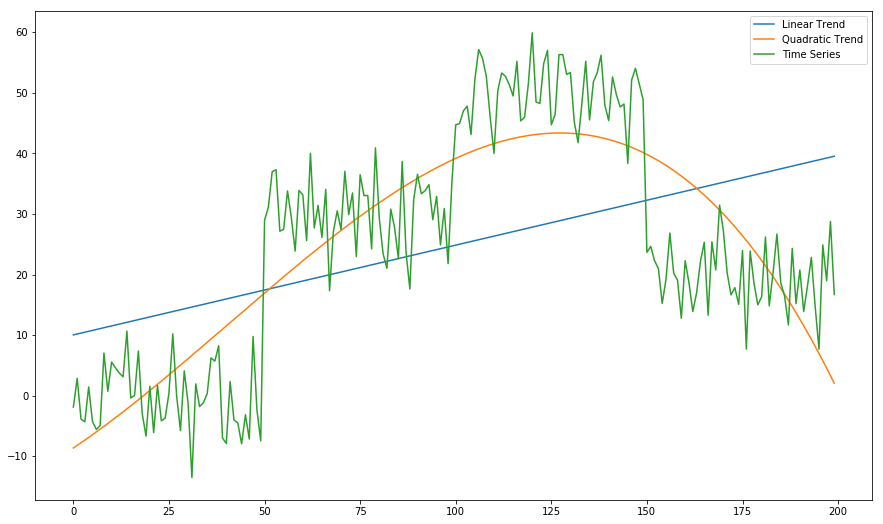

In [158]:
#make a trend changing series
y = [5*np.random.normal() for j in range(50)] + [30 + 5 * np.random.normal() for j in range(50)] +  [50 + 5 * np.random.normal() for j in range(50)] +  [20 + 5 * np.random.normal() for j in range(50)]
X = [x for x in range(len(y))]
X = np.reshape(X, (len(X), 1))

model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)

#degree = 2
# experimenting with other degrees for best fit is an option
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, y)
quadratic = model.predict(X)

fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)
ax.plot(trend, label="Linear Trend")
ax.plot(quadratic, label="Quadratic Trend")
ax.plot(X, y, label='Time Series')
ax.legend()


Here you can see the data isn't always trending up even though the Linear regression indicated a rising trend through out the entire window.  Adding some polynomial regression shows a clearer picture on how the data is trending.

## Removing trend from a time series

Statsmodel comes with a detrending function that can take out a trend with 3 different orders:
* Linear
* Quadratic
* Constant

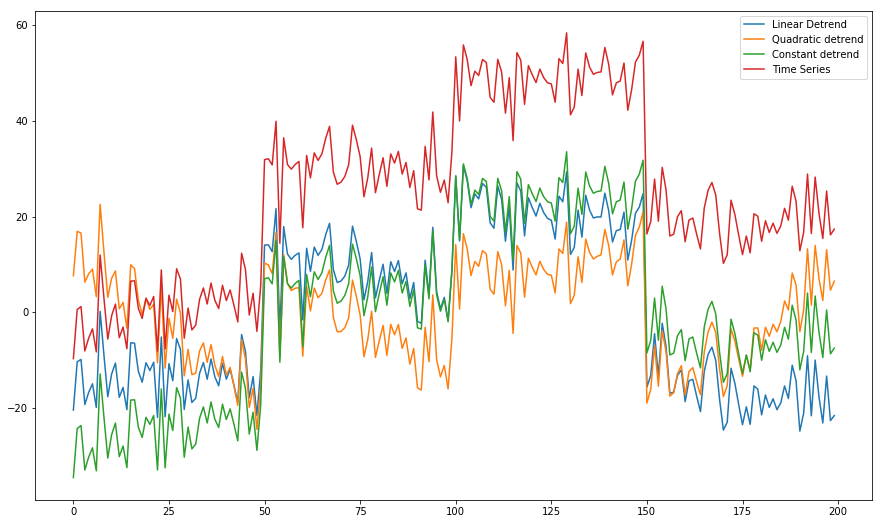

In [150]:
y = np.array(y)
y = np.reshape(y, (len(y), 1))

constant = smt.detrend(y, order=0)

linear = smt.detrend(y, order=1)

quadratic = smt.detrend(y, order=2)

fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)
ax.plot(linear, label="Linear Detrend")
ax.plot(quadratic, label="Quadratic detrend")
ax.plot(constant, label='Constant detrend')
ax.plot(X, y, label='Time Series')


ax.legend()